<a href="https://colab.research.google.com/github/Makoto-Noda/google-Colab/blob/main/Fashion_MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
batch_size = 128
num_class = 10
epochs = 20

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
len(y_train)

60000

In [6]:
keras.backend.image_data_format()

'channels_last'

In [7]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

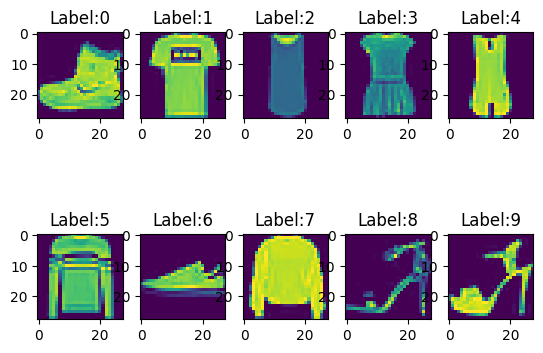

In [8]:
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.title("Label:" + str(i))
  plt.imshow(x_train[i].reshape(28, 28), cmap=None)

In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_class, activation='softmax')
])

In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4625 - accuracy: 0.8363
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3120 - accuracy: 0.8870
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2656 - accuracy: 0.9039
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2367 - accuracy: 0.9136
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2141 - accuracy: 0.9209
Epoch 6/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1949 - accuracy: 0.9275
Epoch 7/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1833 - accuracy: 0.9326
Epoch 8/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1714 - accuracy: 0.9363
Epoch 9/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1580 - accuracy: 0.9402
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.14

In [26]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9320


[0.313042551279068, 0.9319999814033508]

In [27]:
model.predict(x_test[0:1])

1/1 [==============================] - 0s 159ms/step


array([[1.2966902e-23, 7.0728154e-34, 2.3132915e-25, 7.3378886e-27,
        8.1695147e-32, 6.3045812e-18, 1.5185187e-24, 3.1214632e-15,
        1.2764686e-25, 1.0000000e+00]], dtype=float32)

In [29]:
model.predict(x_test[99:100])

1/1 [==============================] - 0s 28ms/step


array([[6.8044548e-09, 9.4857949e-17, 9.9925500e-01, 6.0401004e-11,
        1.1336249e-07, 2.8539816e-17, 7.4484013e-04, 3.6064114e-23,
        3.8336389e-13, 1.2843473e-22]], dtype=float32)

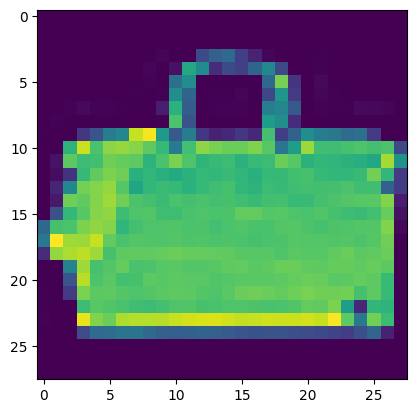

In [30]:
  plt.imshow(x_train[99:100].reshape(28, 28), cmap=None)